In [1]:
from model import DetectMultiBackend

In [2]:
model = DetectMultiBackend()

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


In [18]:
import cv2
from data import letterbox
import numpy as np
import torch

In [19]:
im0 = cv2.imread('hard_gate.png')
print(im0.shape)
im = letterbox(im0, 640, stride=32, auto=True)[0]  # padded resize
im_plot = im
im = im.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
im = np.ascontiguousarray(im)  # contiguous

(144, 256, 3)


(384, 640, 3)


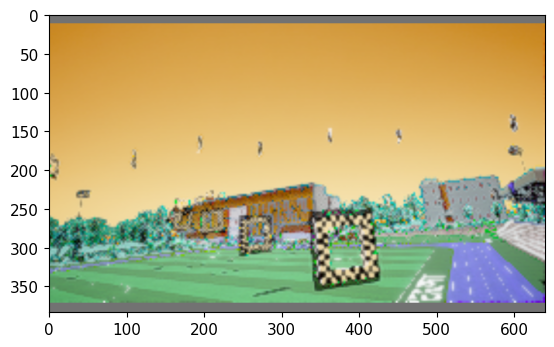

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
print(im_plot.shape)
plt.imshow(im_plot)

(384, 640, 3)

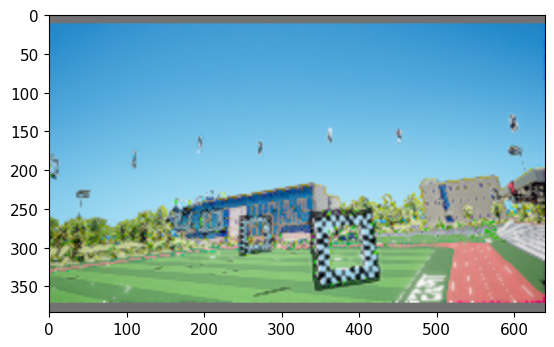

In [21]:
plt.imshow(im.transpose(1, 2, 0))
im.transpose(1, 2, 0).shape

In [22]:
im = torch.from_numpy(im).to(model.device)
im = im.float()
im /= 255

In [23]:
if len(im.shape) == 3:
    im = im[None]  # expand for batch dim

In [24]:
im.shape

torch.Size([1, 3, 384, 640])

In [25]:
pred = model(im, augment=False, visualize=False)

In [26]:
from utils.general import non_max_suppression, scale_boxes

In [27]:
conf_thres = 0.7
iou_thres = 0.45
classes = None
agnostic_nms=False
max_det= 5
pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

In [28]:
pred

[tensor([[337.16827, 251.25798, 426.79803, 356.12329,   0.94409,   0.00000],
         [243.19583, 257.16776, 290.52945, 310.18405,   0.93743,   0.00000]], device='cuda:0')]

In [29]:
im0 = cv2.imread('hard_gate.png')
im0 = cv2.cvtColor(im0, cv2.COLOR_BGR2RGB)
for det in pred:
    det[:, :4] = scale_boxes(im.shape[2:], det[:, :4], im0.shape).round()
    for box in det:
        im0 = cv2.rectangle(im0, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 1)

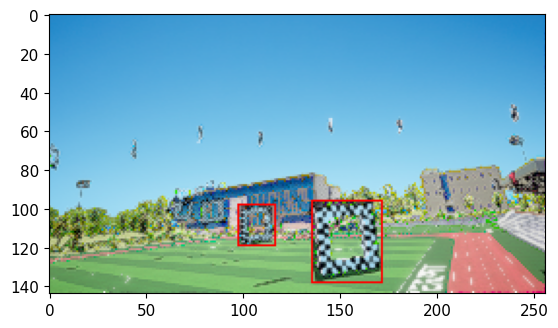

In [30]:
plt.imshow(im0)

In [1]:
from detect import DetectModel

In [2]:
model = DetectModel()

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


In [11]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
im0 = cv2.imread('hard_gate.png')


In [12]:
det = model.detect(im0)

In [13]:
det

tensor([[135.00000,  96.00000, 171.00000, 138.00000,   0.94409,   0.00000],
        [ 97.00000,  98.00000, 116.00000, 119.00000,   0.93743,   0.00000]], device='cuda:0')

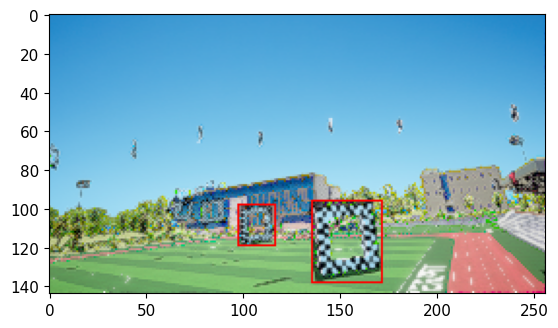

In [17]:
for box in det:
        im0 = cv2.rectangle(im0, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 0, 255), 1)
im0 = cv2.cvtColor(im0, cv2.COLOR_BGR2RGB)
plt.imshow(im0)